# Decision Tree

### Task 1

Visualise and explore the class distribution in this multi-label dataset.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading features from csv file
dataset = pd.read_csv("advertisement.csv")

# splitting dataset into features and labels
labels = dataset.iloc[:, -1]
features = dataset.drop(dataset.columns[-1], axis=1)

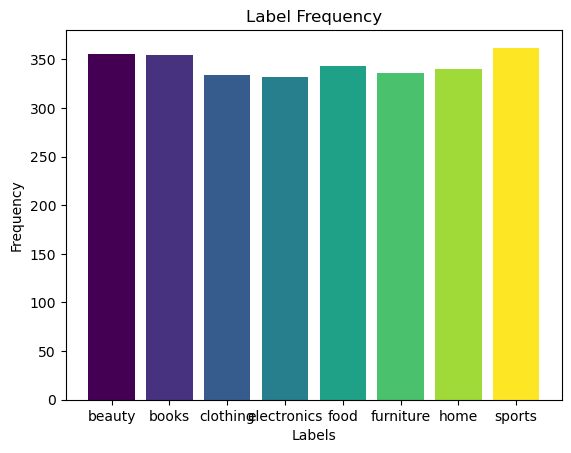

In [3]:
# trying to graphically represent the labels

# Flatten the list of labels
labels_split = [string.split() for string in labels]
all_labels = [item for sublist in labels_split for item in sublist]

# Calculate the frequency of each label
unique_labels, label_counts = np.unique(all_labels, return_counts=True)

# Generate different colors for each label
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Plot the bar graph with different colors for each bar
plt.bar(unique_labels, label_counts, color=colors)

# Add labels and title
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Label Frequency")

plt.savefig("label_freq_graph.png")

# Show the plot
plt.show()

### Task 2

1. Build a Decision Tree Classifier Class with the Powerset Formulation which can be initialized by the following set of hyperparameters = [”max depth”, ”max features”, ”criterion”] 

2. Build a Decision Tree Classifier Class with the MultiOutput Formulation which can be initialized by the following set of hyperparameters = [”max depth”, ”max features”, ”criterion”]

For this you are allowed to use the inbuilt sklearn decision tree. Note you are expected to follow the standard datascience practices where you sequentially do
1. data visualization and exploration
2. data preprocessing
3. data featurization
4. train val test splitting

In [4]:

# dropping the city column
features=features.drop(features.columns[6], axis=1)

# binarising the married and gender columns
features['married'] = features['married'].astype(int)
features['gender'] = features['gender'].map({'Male': 1, 'Female': 0})

features

,age,gender,income,education,married,children,occupation,purchase_amount,most bought item
0,45,1,61271.953359,Master,0,3,Doctor,87.697118,monitor
1,24,0,53229.101074,High School,0,1,Businessman,115.135586,lipstick
2,45,0,30066.046684,Bachelor,1,3,Engineer,101.694559,biscuits
3,19,1,48950.246384,PhD,0,0,Lawyer,97.964887,maggi
4,29,0,44792.627094,Master,0,0,Businessman,86.847281,carpet
...,...,...,...,...,...,...,...,...,...
995,61,1,34246.773063,Master,1,3,HR,103.357441,bed
996,56,0,45494.225591,Bachelor,0,0,Engineer,85.159023,biscuits
997,64,0,68740.442006,PhD,1,0,Salesman,101.434650,bat
998,18,0,44348.446680,Bachelor,1,0,Retired,97.649988,perfume


In [7]:
# one hot encoding the education, occupation and most bought item columns
onehotencoder = OneHotEncoder()
onehotencoded_features = pd.DataFrame(onehotencoder.fit_transform(features[['education', 'occupation', 'most bought item']]).toarray())
encoded_features=features.join(onehotencoded_features)
encoded_features=encoded_features.drop(columns=['education', 'occupation', 'most bought item'])

features

,age,gender,income,education,married,children,occupation,purchase_amount,most bought item
0,45,1,61271.953359,Master,0,3,Doctor,87.697118,monitor
1,24,0,53229.101074,High School,0,1,Businessman,115.135586,lipstick
2,45,0,30066.046684,Bachelor,1,3,Engineer,101.694559,biscuits
3,19,1,48950.246384,PhD,0,0,Lawyer,97.964887,maggi
4,29,0,44792.627094,Master,0,0,Businessman,86.847281,carpet
...,...,...,...,...,...,...,...,...,...
995,61,1,34246.773063,Master,1,3,HR,103.357441,bed
996,56,0,45494.225591,Bachelor,0,0,Engineer,85.159023,biscuits
997,64,0,68740.442006,PhD,1,0,Salesman,101.434650,bat
998,18,0,44348.446680,Bachelor,1,0,Retired,97.649988,perfume


#### Powerset

In [8]:
# encoding the labels for powerset
labelencoder = LabelEncoder()
encoded_labels = labelencoder.fit_transform(labels)

In [9]:
# splitting the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(encoded_features, encoded_labels, test_size=0.2, random_state=0)

In [10]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(xtrain.values, ytrain)
decision_tree_classifier.get_params()

# predicting the test set results
y_pred = decision_tree_classifier.predict(xtest.values)

# calculating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy: " + str(accuracy))

# plot_tree(decision_tree_classifier)

Accuracy: 0.035
